# Nut Dichotomy
<hr style="border:3px solid gray"> </hr>

## Project Objective & Deliverables
Utilizing smaller pecans to encourage turtle size consistency and decrease waste.

## Key Take Aways
Manifest evidence that consistency is reduced. However, average volume remains fixed -- the 'notched' regions are roughly equal, which exhibts statistically equal averages. Beneficially, the triangles and middle lines are approximately equal; hence, Gaussian statistics applies.
<hr style="border:2px solid gray"> </hr>

## Import Modules

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math

## Load Data and Clean

In [2]:
# Define SKUs & Load Data Frame
SKU_list = [8000038, 8000035, 8000046, 8000402, 8000039, 8000413]
base_df = pd.read_excel('Updated Scrap Tracking.xlsx', 'Python')

In [3]:
# Filter NaN SKUs & Scrap Percentages Greater than 40%
base_df = base_df[base_df['SKU'].isin(SKU_list)]
base_df = base_df[base_df['Scrap Percentage'] < 0.4]
base_df['Scrap Target'] = 0.03
base_df['Scrap Percentage'] = 100 * base_df['Scrap Percentage']
sku_df = base_df.groupby('SKU')

## Plot Scrap Percentages by SKU

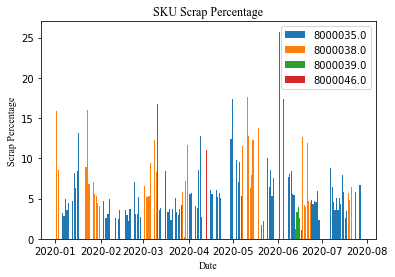

In [4]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date', fontname='Times New Roman')
ax1.set_ylabel('Scrap Percentage', fontname='Times New Roman')
ax1.set_title('SKU Scrap Percentage', fontname='Times New Roman')

for sku, group in sku_df:
    ax1.bar(group['Date'], group['Scrap Percentage'], label=sku)
ax1.legend()

## Observe Mean & Standard Deviations by SKU

In [5]:
sku_df['Scrap Percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
SKU,,,,,,,,
8000035.0,89.0,5.946497,3.827578,2.268962,3.593481,5.018074,6.627566,25.734915
8000038.0,37.0,8.133073,4.029150,0.167021,5.227529,6.832911,11.651707,17.585624
8000039.0,7.0,2.305464,1.052407,1.100689,1.491711,2.196753,2.973307,3.910774
8000046.0,3.0,7.350537,4.332136,2.586556,5.498904,8.411252,9.732527,11.053803


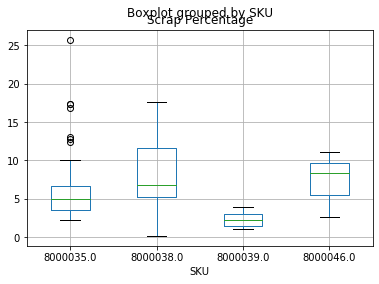

In [6]:
base_df.boxplot(column='Scrap Percentage',by='SKU')

<b>Backbone</b>: Original <br>
<b>Icebreg</b>: Dark Almond Original, Bite <br>
<b>Stars</b>: Mini <br>
<b>Problem Children</b>: Bite, Sea Salt <br>
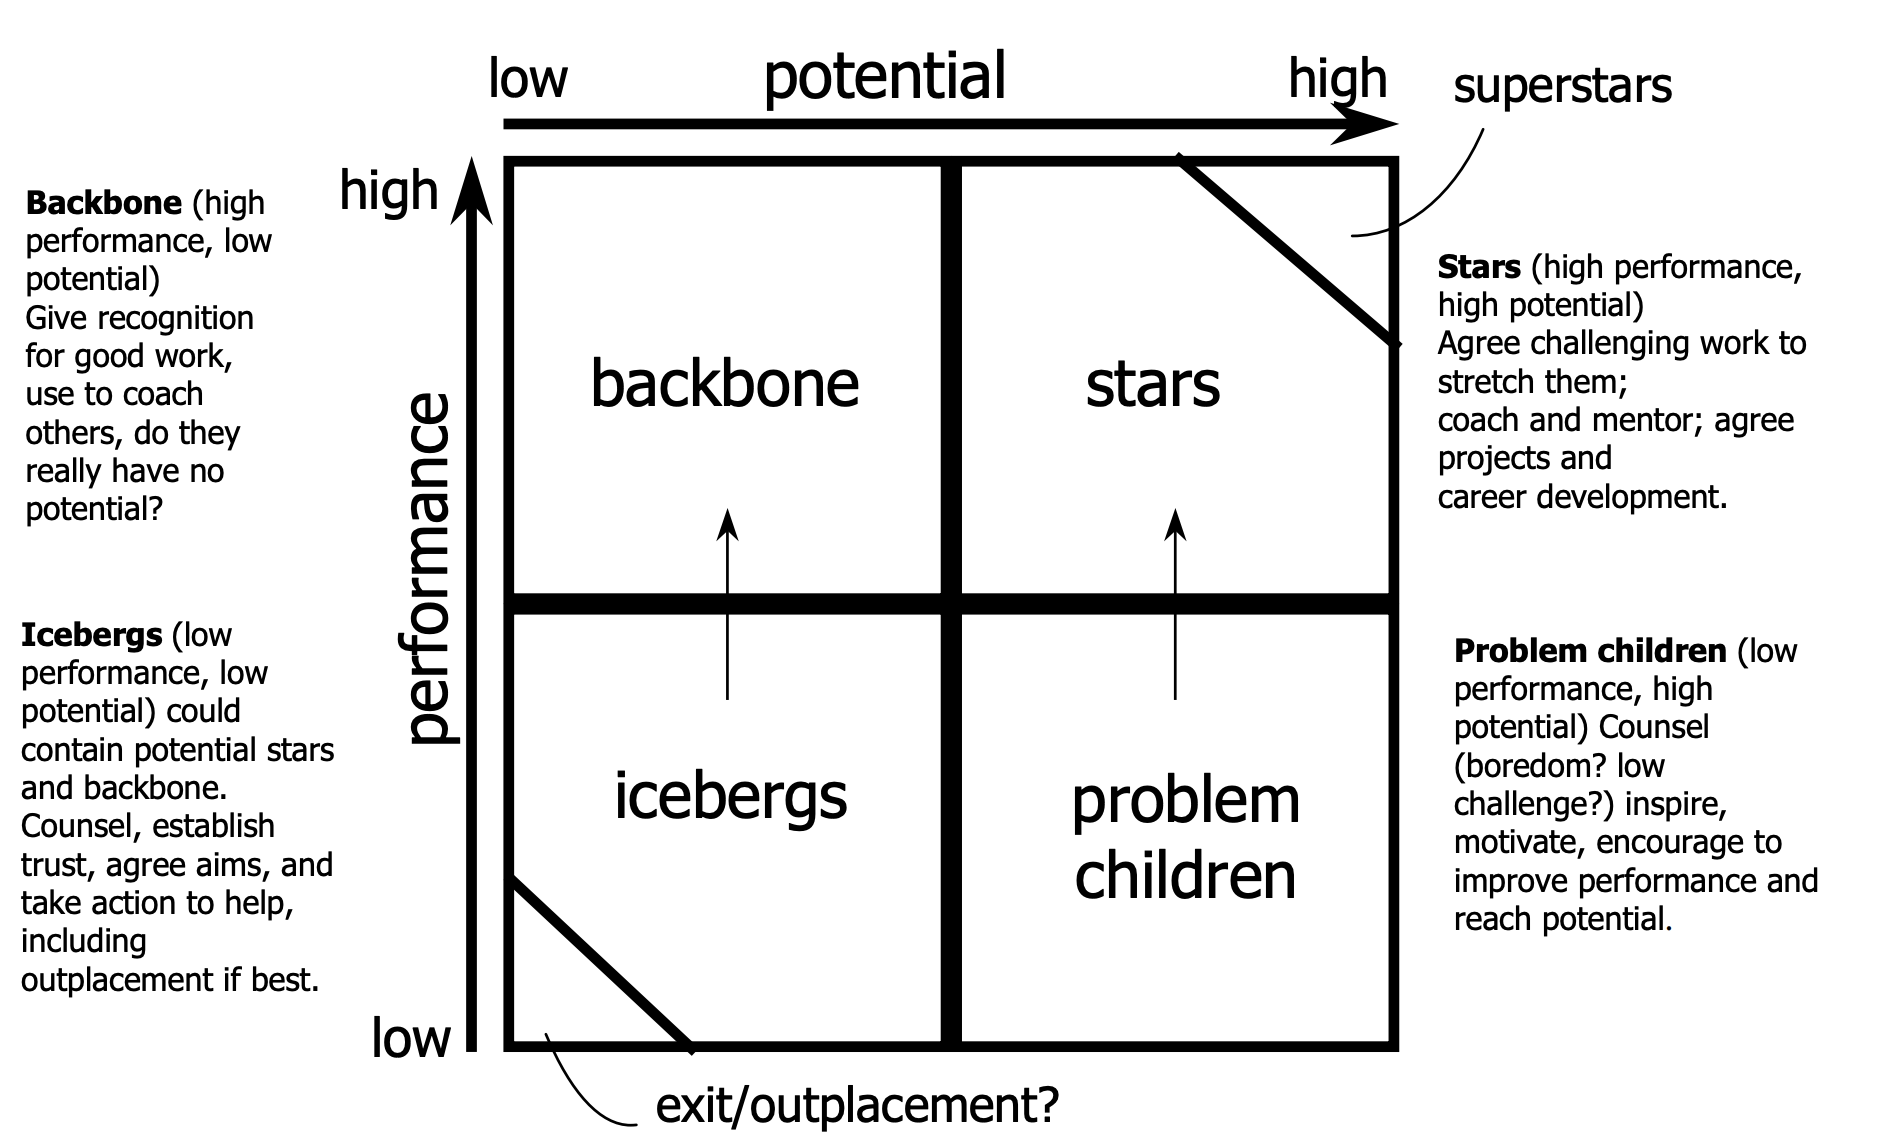

<hr style="border:2px solid gray"> </hr>

# Observe Differential of Using Bite Size Nuts

In [7]:
ante_scrap = base_df[(base_df['Date'] < '06/19/2020') & (base_df['SKU'] == 8000038)]
exante_scrap = base_df[(base_df['Date'] >= '06/19/2020') & (base_df['SKU'] == 8000038)]

Ante
count    29.000000
mean      8.784717
std       4.142887
min       0.167021
25%       5.588889
50%       7.988235
75%      12.221966
max      17.585624
Name: Scrap Percentage, dtype: float64
Exante
count     8.000000
mean      5.770863
std       2.588229
min       3.914522
25%       4.509278
50%       4.746448
75%       5.830596
max      11.873664
Name: Scrap Percentage, dtype: float64


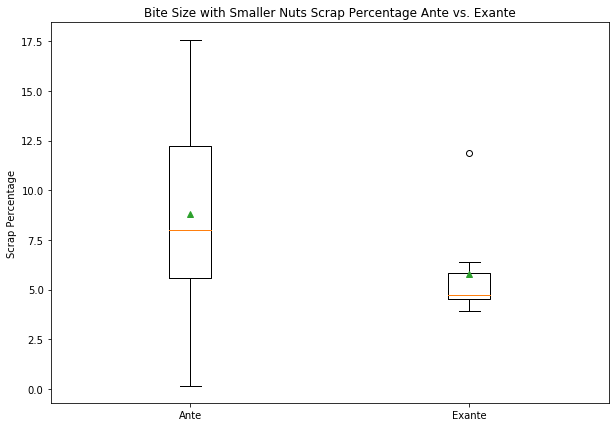

Inconclusive, we will wait for more Bite Size operations. The difference between scrap percentage is 3.014%.


In [8]:
print('Ante')
print(ante_scrap['Scrap Percentage'].describe())
print('Exante')
print(exante_scrap['Scrap Percentage'].describe())
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.set_title('Bite Size with Smaller Nuts Scrap Percentage Ante vs. Exante')
ax.set_ylabel('Scrap Percentage')
bp = ax.boxplot([ante_scrap['Scrap Percentage'],exante_scrap['Scrap Percentage']],
                showmeans=True,
                labels=['Ante','Exante'])
plt.show()
print('Inconclusive, we will wait for more Bite Size operations. The difference between scrap percentage is ' + 
     str(round(ante_scrap['Scrap Percentage'].mean() - exante_scrap['Scrap Percentage'].mean(),3)) + '%.')

Ante Scrap ($)
count      29.000000
mean     1947.634395
std       795.026985
min         9.310000
25%      1567.944040
50%      2099.021860
75%      2324.560000
max      3963.120000
Name: Scrap ($), dtype: float64
Exante Scrap ($)
count       8.000000
mean     1470.980000
std       458.240168
min       789.880000
25%      1037.330000
50%      1666.000000
75%      1786.050000
max      2032.520000
Name: Scrap ($), dtype: float64


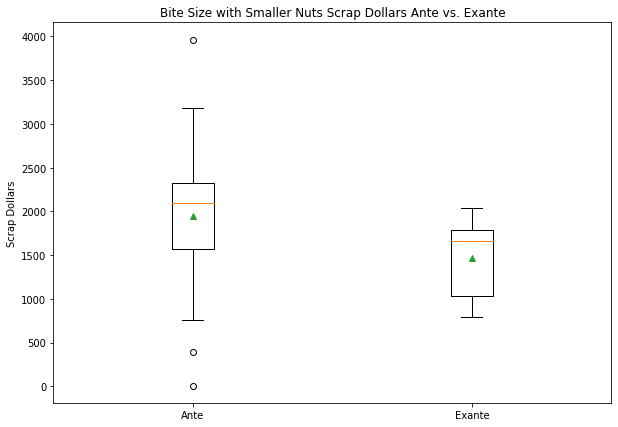

Inconclusive, we will wait for more Bite Size operations. The difference between scrap, in dollars, is $476.654.


In [9]:
print('Ante Scrap ($)')
print(ante_scrap['Scrap ($)'].describe())
print('Exante Scrap ($)')
print(exante_scrap['Scrap ($)'].describe())
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.set_title('Bite Size with Smaller Nuts Scrap Dollars Ante vs. Exante')
ax.set_ylabel('Scrap Dollars')
bp = ax.boxplot([ante_scrap['Scrap ($)'],exante_scrap['Scrap ($)']], 
                showmeans=True,
                labels=['Ante','Exante'])
plt.show()
print('Inconclusive, we will wait for more Bite Size operations. The difference between scrap, in dollars, is $' + 
     str(round(ante_scrap['Scrap ($)'].mean() - exante_scrap['Scrap ($)'].mean(),3)) + '.')

## 3D Profile

In [10]:
qa_base_df = pd.read_excel('QA_Turtle_Measurement_Observations.xlsx', 'QA_Turtle_Measurements_Archive')
qa_base_df = qa_base_df.drop(columns=['Comments','Initials','Julian Date'])
qa_base_df = qa_base_df[(qa_base_df['Date'] > '2020-05-04') & (qa_base_df['SKU'] == '8000038')]
qa_base_df.dropna()
qa_base_df['Volume'] = qa_base_df['Width (mm)'] * qa_base_df['Length (mm)'] * qa_base_df['Height (mm)'] * (2/3) * (math.pi)

In [11]:
qa_base_df_ante = qa_base_df[(qa_base_df['Date'] < '2020-06-19')]
qa_base_df_exante = qa_base_df[(qa_base_df['Date'] >= '2020-06-19')]

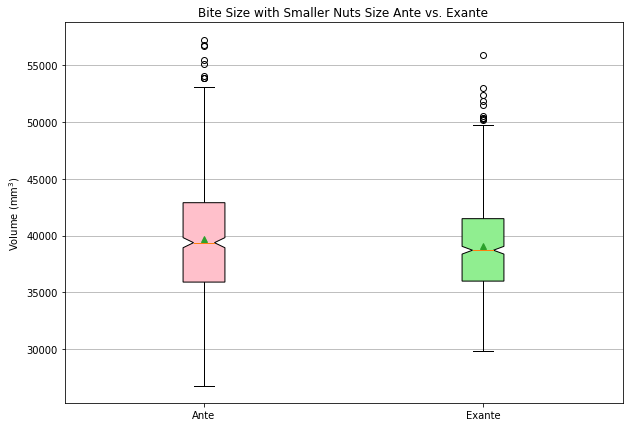

In [12]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.set_title('Bite Size with Smaller Nuts Size Ante vs. Exante')
ax.set_ylabel('Volume (mm$^3$)')
ax.yaxis.grid(True)
bp = ax.boxplot([qa_base_df_ante['Volume'],qa_base_df_exante['Volume']],
                showmeans=True,
                labels=['Ante','Exante'],
                notch=True,
                patch_artist=True)
colors = ['pink','lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

Manifest evidence that consistency is reduced. However, average volume remains fixed -- the 'notched' regions are roughly equal, which exhibts statistically equal averages. Beneficially, the triangles and middle lines are approximately equal; hence, Gaussian statistics applies.